In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_redundant=1,
    n_classes=2,
    random_state=42
)
dataframe=pd.DataFrame(X,columns=['f1','f2','f3','f4','f5'])
dataframe['target']=y
dataframe.head()

,f1,f2,f3,f4,f5,target
0,-0.038769,-0.649239,-0.224746,-1.346275,0.126879,0
1,1.005284,-1.373239,1.157346,0.126493,1.422799,0
2,-0.742455,-0.573257,1.688442,-2.588237,0.762562,0
3,-1.587158,1.758582,-0.930664,0.764614,2.415399,1
4,0.195806,-0.058897,-0.549360,0.777375,1.147261,1


In [ ]:
def row_sampling(df,percentage):
  return df.sample(int(df.shape[0]*percentage))
def col_sampling(df,percentage):
  features=df.iloc[0:,0:-1].sample(int(df.shape[1]*percentage),axis=1)
  return pd.concat([features,df['target']],axis=1)
def combine_sampling(df,row_percentage,col_percentage):
  df1=row_sampling(df,row_percentage)
  df2=col_sampling(df1,col_percentage)
  return df2

### **Using Row Sampling:**

In [ ]:
df1=row_sampling(dataframe,0.2)
df2=row_sampling(dataframe,0.2)
df3=row_sampling(dataframe,0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc2=DecisionTreeClassifier()
dtc3=DecisionTreeClassifier()
dtc1.fit(df1.iloc[0:,0:-1],df1['target'])
dtc2.fit(df2.iloc[0:,0:-1],df2['target'])
dtc3.fit(df3.iloc[0:,0:-1],df3['target'])

DecisionTreeClassifier()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
p1=dtc1.predict(np.array([-0.038769,	-0.649239,	-0.224746,	-1.346275,	0.126879]).reshape(1,5))

In [ ]:
p2=dtc2.predict(np.array([-0.038769,	-0.649239,	-0.224746,	-1.346275,	0.126879]).reshape(1,5))

In [ ]:
p3=dtc3.predict(np.array([-0.038769,	-0.649239,	-0.224746,	-1.346275,	0.126879]).reshape(1,5))

In [ ]:
max(p1,p2,p3)

array([0])

### **Using Column sampling:**

In [ ]:
df1=col_sampling(dataframe,0.8)
df2=col_sampling(dataframe,0.8)
df3=col_sampling(dataframe,0.8)
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df1

,f3,f1,f4,f5,target
0,-0.224746,-0.038769,-1.346275,0.126879,0
1,1.157346,1.005284,0.126493,1.422799,0
2,1.688442,-0.742455,-2.588237,0.762562,0
3,-0.930664,-1.587158,0.764614,2.415399,1
4,-0.549360,0.195806,0.777375,1.147261,1
...,...,...,...,...,...
995,1.626380,0.678309,-0.773871,2.621597,0
996,-0.144288,-0.879184,1.235924,2.155361,1
997,0.487905,-0.933235,1.679197,-0.013641,1
998,1.490379,0.947739,1.341938,1.245160,1


In [ ]:
df2

,f1,f5,f2,f3,target
0,-0.038769,0.126879,-0.649239,-0.224746,0
1,1.005284,1.422799,-1.373239,1.157346,0
2,-0.742455,0.762562,-0.573257,1.688442,0
3,-1.587158,2.415399,1.758582,-0.930664,1
4,0.195806,1.147261,-0.058897,-0.549360,1
...,...,...,...,...,...
995,0.678309,2.621597,-1.671163,1.626380,0
996,-0.879184,2.155361,1.222463,-0.144288,1
997,-0.933235,-0.013641,1.919488,0.487905,1
998,0.947739,1.245160,-0.667830,1.490379,1


In [ ]:
df3

,f3,f1,f2,f5,target
0,-0.224746,-0.038769,-0.649239,0.126879,0
1,1.157346,1.005284,-1.373239,1.422799,0
2,1.688442,-0.742455,-0.573257,0.762562,0
3,-0.930664,-1.587158,1.758582,2.415399,1
4,-0.549360,0.195806,-0.058897,1.147261,1
...,...,...,...,...,...
995,1.626380,0.678309,-1.671163,2.621597,0
996,-0.144288,-0.879184,1.222463,2.155361,1
997,0.487905,-0.933235,1.919488,-0.013641,1
998,1.490379,0.947739,-0.667830,1.245160,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc2=DecisionTreeClassifier()
dtc3=DecisionTreeClassifier()
dtc1.fit(df1.iloc[0:,0:-1],df1['target'])
dtc2.fit(df2.iloc[0:,0:-1],df2['target'])
dtc3.fit(df3.iloc[0:,0:-1],df3['target'])

DecisionTreeClassifier()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
p1=dtc1.predict(np.array([-0.649239,	-0.224746,	-0.038769,	-1.346275	]).reshape(1,4))

In [ ]:
p2=dtc2.predict(np.array([-1.346275,	-0.224746,	0.126879,	-0.649239]).reshape(1,4))

In [ ]:
p3=dtc3.predict(np.array([-0.649239,	-0.224746,	-1.346275,	0.126879]).reshape(1,4))

In [ ]:
max(p1,p2,p3)

array([1])

### **Using the combination:**

In [ ]:
df1=combine_sampling(dataframe,0.2,0.8)
df2=combine_sampling(dataframe,0.2,0.8)
df3=combine_sampling(dataframe,0.2,0.8)
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df1

,f5,f2,f3,f4,target
428,0.103816,-0.630887,1.989855,-1.839366,0
690,-2.000912,-2.312333,-1.409107,-0.493294,0
764,0.396635,1.040386,-1.195624,1.304193,1
278,-0.163797,-0.816566,0.672943,-0.074517,0
166,1.870548,-1.061985,0.972997,-2.338948,0
...,...,...,...,...,...
105,0.118365,1.315395,0.790379,1.266801,1
236,-0.935003,-1.953573,-0.473865,-0.160908,0
188,1.894307,-1.335607,1.507634,-1.312519,0
530,0.237042,-1.936975,-0.908206,0.502107,0


In [ ]:
df2

,f2,f5,f3,f1,target
998,-0.667830,1.245160,1.490379,0.947739,1
283,-2.760072,0.080600,0.211600,2.587211,0
415,-0.607656,0.240807,-1.836072,-0.628565,0
814,-2.358815,0.808765,0.959957,2.079783,1
110,-0.608346,-1.533602,0.785812,0.096478,0
...,...,...,...,...,...
44,-0.083362,0.387097,-0.597423,0.518114,1
411,-2.539619,0.028187,-0.023025,2.391681,0
793,-1.163995,1.594259,-0.775034,0.260357,0
497,-1.463502,-1.923523,1.182566,1.075461,0


In [ ]:
df3

,f2,f3,f1,f5,target
441,-2.382148,-0.293406,2.304853,2.221652,1
201,-0.171980,0.141766,-0.376333,-1.894305,0
194,-1.388480,-0.789347,1.543544,1.447356,1
216,-0.311270,0.144343,-0.219193,-0.554352,0
242,-0.957300,0.807445,1.044114,0.931327,1
...,...,...,...,...,...
359,-1.251789,0.898648,1.161884,0.590969,1
846,0.740932,1.509458,-0.732574,2.104769,1
449,-0.976001,2.350206,0.237552,0.859455,0
459,0.832956,-1.167534,-0.304630,0.203356,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier()
dtc2=DecisionTreeClassifier()
dtc3=DecisionTreeClassifier()
dtc1.fit(df1.iloc[0:,0:-1],df1['target'])
dtc2.fit(df2.iloc[0:,0:-1],df2['target'])
dtc3.fit(df3.iloc[0:,0:-1],df3['target'])

DecisionTreeClassifier()

In [ ]:
dataframe

,f1,f2,f3,f4,f5,target
0,-0.038769,-0.649239,-0.224746,-1.346275,0.126879,0
1,1.005284,-1.373239,1.157346,0.126493,1.422799,0
2,-0.742455,-0.573257,1.688442,-2.588237,0.762562,0
3,-1.587158,1.758582,-0.930664,0.764614,2.415399,1
4,0.195806,-0.058897,-0.549360,0.777375,1.147261,1
...,...,...,...,...,...,...
995,0.678309,-1.671163,1.626380,-0.773871,2.621597,0
996,-0.879184,1.222463,-0.144288,1.235924,2.155361,1
997,-0.933235,1.919488,0.487905,1.679197,-0.013641,1
998,0.947739,-0.667830,1.490379,1.341938,1.245160,1


In [ ]:
import warnings
warnings.filterwarnings('ignore')
p1=dtc1.predict(np.array([-0.038769,-1.346275,-0.224746,0.126879]).reshape(1,4))

In [ ]:
p2=dtc1.predict(np.array([-0.038769,-0.649239,0.126879,-1.346275]).reshape(1,4))

In [ ]:
p3=dtc1.predict(np.array([-1.346275,-0.649239,-0.038769,-0.224746	]).reshape(1,4))

In [ ]:
max(p1,p2,p3)

array([1])

   Feature1  Feature2  Class
0  0.241903  0.434521      1
1 -0.050811  0.389974      1
2 -0.785393  1.036206      1
3 -0.920987  0.039362      1
4  0.505007 -0.863648      0


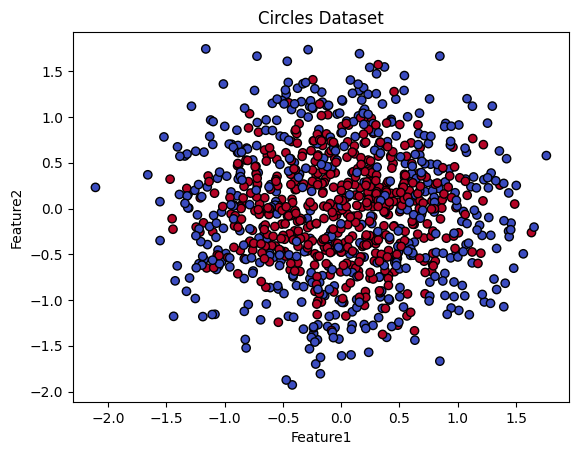

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt

# Generate a circular classification dataset
X, y = make_circles(
    n_samples=1000,      # Number of samples
    noise=0.4,          # Noise level to add randomness
    factor=0.5,         # Scale factor between inner and outer circle
    random_state=42     # Random state for reproducibility
)

# Convert to DataFrame
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Class"] = y

# Display the first few rows of the dataset
print(df.head())

# Visualize the dataset
plt.scatter(df["Feature1"], df["Feature2"], c=df["Class"], cmap="coolwarm", edgecolor="k")
plt.title("Circles Dataset")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


### **Decision boundary for decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier()
X_train,X_test,y_train,y_test=train_test_split(df.iloc[0:,0:-1],df['Class'],test_size=0.2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predicted=dtc.predict(X_test)
predicted

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0])

In [ ]:
accuracy_score(predicted,y_test)

0.64

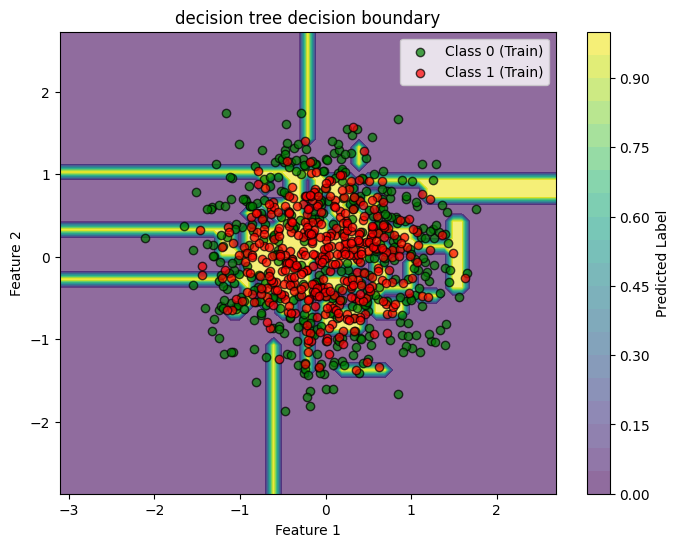

In [ ]:
def plot_decision_boundary(X, y,labels):
    # Convert inputs to NumPy arrays if they're pandas objects
    X = np.array(X)
    Y = np.array(y)
    # Check dimensions of X and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x = np.arange(x_min, x_max, 0.1)
    y = np.arange(y_min, y_max, 0.1)
    XX, YY = np.meshgrid(x, y)
    # Flatten the grid to pass through the classifier
    grid_points = np.c_[XX.ravel(), YY.ravel()]
    plt.figure(figsize=(8, 6))
    dtc=DecisionTreeClassifier()
    dtc.fit(X,Y)
    labels=dtc.predict(grid_points)
    # Plot the decision boundary
    plt.contourf(XX, YY, labels.reshape(XX.shape), levels=20, cmap="viridis", alpha=0.6)
    plt.colorbar(label="Predicted Label")
    # Plot the data points
    plt.scatter(X[Y == 0,0], X[Y == 0,1], color="green", edgecolor="k", label="Class 0 (Train)",alpha=0.7)
    plt.scatter(X[Y == 1,0], X[Y == 1,1], color="red", edgecolor="k", label="Class 1 (Train)",alpha=0.7)
    # Add titles and labels
    plt.title(f"decision tree decision boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
plot_decision_boundary(X_train,y_train,predicted)

###**Decision boundary for random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
predicted=rfc.predict(X_test)
accuracy_score(predicted,y_test)

0.73

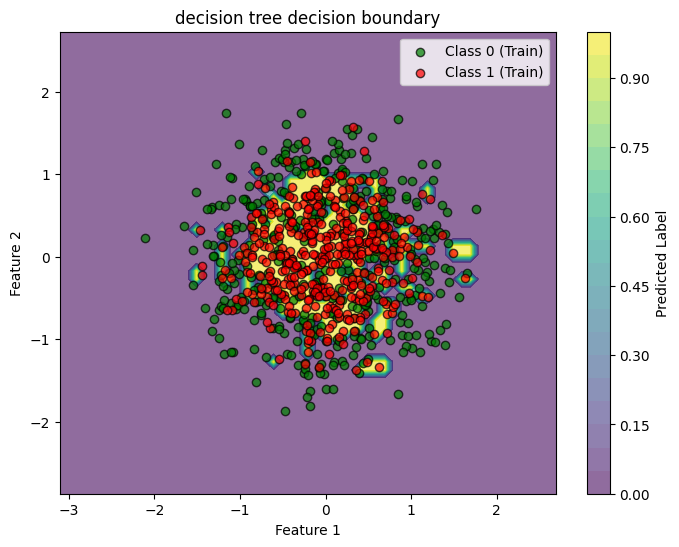

In [ ]:
def plot_decision_boundary(X, y,labels):
    # Convert inputs to NumPy arrays if they're pandas objects
    X = np.array(X)
    Y = np.array(y)
    # Check dimensions of X and y
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x = np.arange(x_min, x_max, 0.1)
    y = np.arange(y_min, y_max, 0.1)
    XX, YY = np.meshgrid(x, y)
    # Flatten the grid to pass through the classifier
    grid_points = np.c_[XX.ravel(), YY.ravel()]
    plt.figure(figsize=(8, 6))
    rfc=RandomForestClassifier()
    rfc.fit(X,Y)
    labels=rfc.predict(grid_points)
    # Plot the decision boundary
    plt.contourf(XX, YY, labels.reshape(XX.shape), levels=20, cmap="viridis", alpha=0.6)
    plt.colorbar(label="Predicted Label")
    # Plot the data points
    plt.scatter(X[Y == 0,0], X[Y == 0,1], color="green", edgecolor="k", label="Class 0 (Train)",alpha=0.7)
    plt.scatter(X[Y == 1,0], X[Y == 1,1], color="red", edgecolor="k", label="Class 1 (Train)",alpha=0.7)
    # Add titles and labels
    plt.title(f"decision tree decision boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
plot_decision_boundary(X_train,y_train,predicted)

###**Bagging vs Random Forest**

Accuracy: 0.80


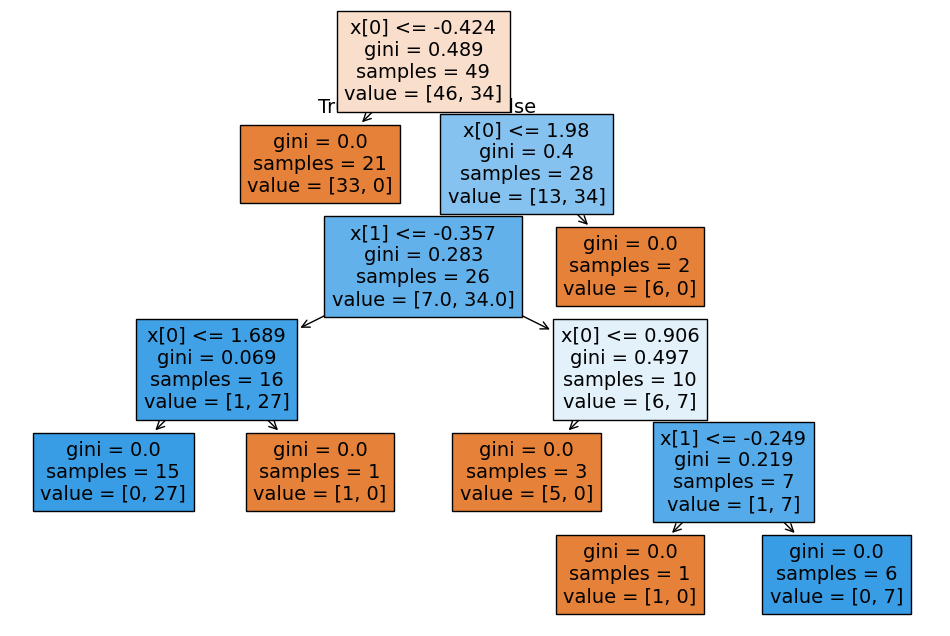

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X, y = make_classification(
    n_redundant=0,
    n_features=5,
    n_informative=5,
    n_clusters_per_class=1,
)
df = pd.DataFrame(X, columns=["Feature1", "Feature2","Feature3","Feature4","Feature5"])
df["Class"] = y
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    max_features=2,
    random_state=42,
)
X_train,X_test,y_train,y_test=train_test_split(df.iloc[0:,0:-1],df['Class'],test_size=0.2)
bagging.fit(X_train, y_train)
predicted = bagging.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(bagging.estimators_[2], filled=True)
plt.show()

Accuracy: 0.80


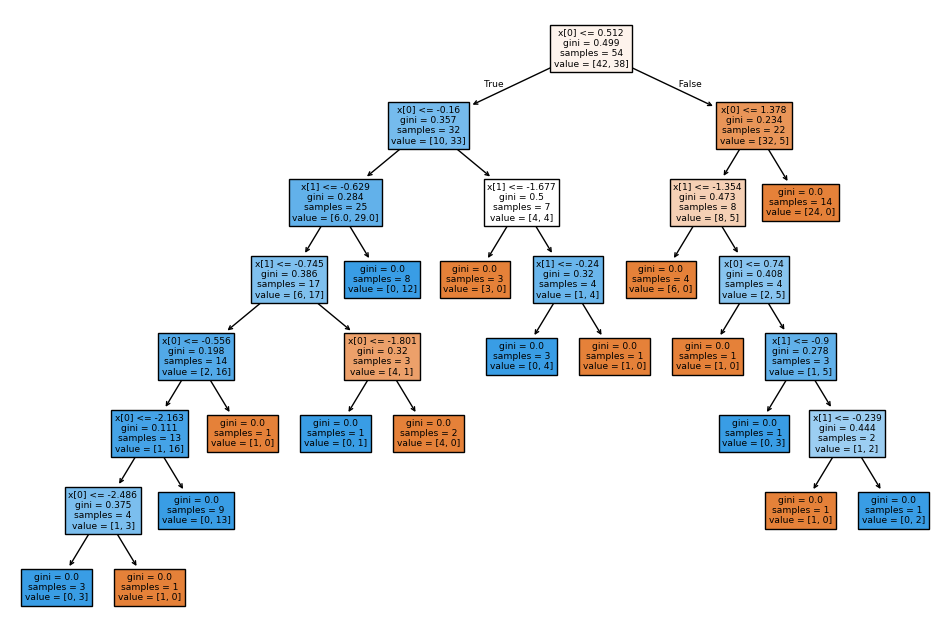

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(
    max_features=2,
    bootstrap=True,
)
rfc.fit(X_train,y_train)
predicted=rfc.predict(X_test)
accuracy_score(predicted,y_test)
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(bagging.estimators_[0], filled=True)
plt.show()

###**Hyper parameter tuning in random forest**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#loading the dataset
dataset=pd.read_csv("/content/placementdata.csv")
dataset

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [ ]:
#convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['ExtracurricularActivities']=le.fit_transform(dataset['ExtracurricularActivities'])
dataset['PlacementTraining']=le.fit_transform(dataset['PlacementTraining'])
dataset["PlacementStatus"]=le.fit_transform(dataset["PlacementStatus"])

In [ ]:
#training different models and calculating the accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#splitting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(dataset.iloc[0:,0:-1],dataset['PlacementStatus'],test_size=0.2)
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()

In [ ]:
#fitting the models
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
dtc.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
svc.fit(X_train,y_train)


SVC()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
lr_predicted=lr.predict(X_test)
dtc_predicted=dtc.predict(X_test)
rfc_predicted=rfc.predict(X_test)
svc_predicted=svc.predict(X_test)
knn_predicted=knn.predict(X_test)

In [ ]:
lr_accuracy=accuracy_score(lr_predicted,y_test)
dtc_accuracy=accuracy_score(dtc_predicted,y_test)
rfc_accuracy=accuracy_score(rfc_predicted,y_test)
svc_accuracy=accuracy_score(svc_predicted,y_test)
knn_accuracy=accuracy_score(knn_predicted,y_test)
print("accuracy score for logistic regression: ",lr_accuracy)
print("accuracy score for decision tree classifier: ",dtc_accuracy)
print("accuracy score for random forest classifier: ",rfc_accuracy)
print("accuracy score for support vector classifier: ",svc_accuracy)
print("accuracy score for k nearest neighbors classifier: ",knn_accuracy)

accuracy score for logistic regression:  0.767
accuracy score for decision tree classifier:  0.729
accuracy score for random forest classifier:  0.7895
accuracy score for support vector classifier:  0.5915
accuracy score for k nearest neighbors classifier:  0.757


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(oob_score=True,bootstrap=True)
rfc.fit(X_train,y_train)
predicted=rfc.predict(X_test)
print("accuracy score: ",accuracy_score(predicted,y_test))
print("oob score: ",rfc.oob_score_)

accuracy score:  0.779
oob score:  0.78775


###**Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[10,50,100,200,None],
    'max_depth':[None,5,10,20,30],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[10,20],
}

In [ ]:
rfc=RandomForestClassifier()
grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200, None]})

In [ ]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 50}

In [ ]:
#training the random forest classifier using above parameters
rfc=RandomForestClassifier(n_estimators=50,min_samples_split=5,min_samples_leaf=10,max_depth=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=50)

In [ ]:
predicted=rfc.predict(X_train)
print("accuracy score ",accuracy_score(predicted,y_train))

accuracy score  0.84325


###**Out of Bag Samples**

In a Random Forest model, each decision tree is trained on a bootstrap sample, which is created by randomly selecting data points with replacement from the original dataset. Some data points are not selected during this sampling process—these are known as out-of-bag (OOB) samples.

###**Feature Importance**

In [ ]:
dataframe=pd.read_csv("/content/sample_data/mnist_train_small.csv")
dataframe.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#training the random forest classifier on the above data
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(dataframe.iloc[0:,1:],dataframe['6'])

RandomForestClassifier()

In [ ]:
print(rfc.feature_importances_.shape)
feature_importances=rfc.feature_importances_

(784,)


<Axes: >

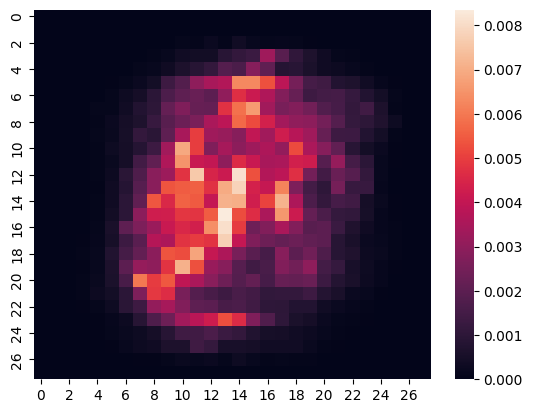

In [ ]:
sns.heatmap(feature_importances.reshape(28,28))

**Calculation:**

In [ ]:
from sklearn.datasets import make_classification
X,y=make_classification(
    n_samples=10,
    n_classes=2,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42,

)
X.shape

(10, 2)

In [ ]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
#training the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

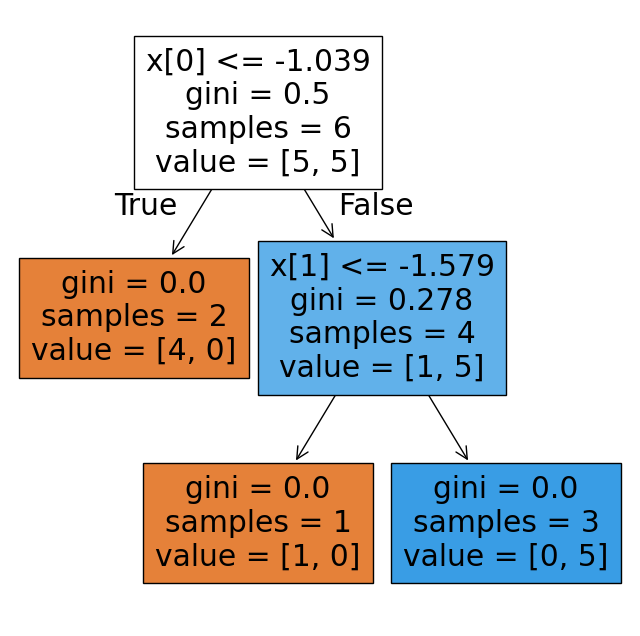

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(rfc.estimators_[0],filled=True)
plt.show()

In [ ]:
#printing the feature importances
print(rfc.feature_importances_)

[0.54534166 0.45465834]


###**Calculating feature importances for the Random Forest algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#training the random forest algorithm
rfc=RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(dataframe.iloc[0:,0:-1],dataframe['6'],test_size=0.2)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#predicting the values
predicted=rfc.predict(X_test)
print("accuracy score: ",accuracy_score(predicted,y_test))

accuracy score:  0.976


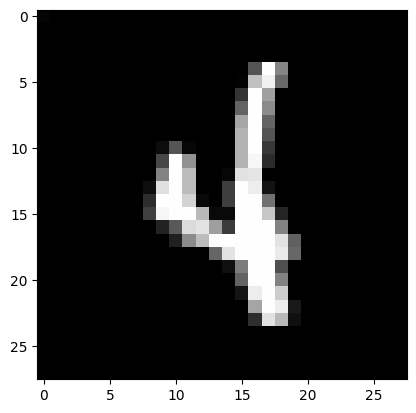

In [ ]:
#prediction
import random
random_index=random.randint(0,X_test.shape[0])
random_sample=X_test.iloc[random_index]
#this sample we need to give as input to the model to predict
import matplotlib.pyplot as plt
plt.imshow(random_sample.values.reshape(28,28),cmap="gray")

In [ ]:
print(rfc.predict(np.array([random_sample])))

[4]


In [ ]:
from sklearn.tree import plot_tree
feature_importances=[]
for i in range(rfc.n_estimators):
  feature_importances.append(rfc.feature_importances_)
feature_importances=np.array(feature_importances)

In [ ]:
feature_importances.mean(axis=0)

array([7.34159133e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34122923e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.69539784e-06, 0.00000000e+00, 2.08471996e-06, 0.00000000e+00,
       0.00000000e+00, 6.54506976e-06, 2.67014922e-06, 1.19095297e-06,
       3.77925152e-06, 9.26431933e-07, 3.17220448e-06, 0.00000000e+00,
       1.19577570e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
rfc.feature_importances_

array([7.34159133e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34122923e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.69539784e-06, 0.00000000e+00, 2.08471996e-06, 0.00000000e+00,
       0.00000000e+00, 6.54506976e-06, 2.67014922e-06, 1.19095297e-06,
       3.77925152e-06, 9.26431933e-07, 3.17220448e-06, 0.00000000e+00,
       1.19577570e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      